In [1]:
from DecisionTree import DTLearner
import numpy as np
import time
from sklearn.model_selection import train_test_split
import random

In [2]:
strdata=np.loadtxt('fertility.csv', delimiter=',', dtype=str)

In [3]:
#Cleaning up the data
input=strdata[:,0:-1]
input=input.astype('float')
output=strdata[:,-1:]
output[output== 'N'] = -1 #normal fertility is a -1
output[output== 'O'] = 1 #abnormal fertility is 1
output=output.astype('float')

In [4]:
#getting it ready
random.seed(100)
X_train, X_test, y_train, y_test = train_test_split (input, output)
learner=DTLearner(leaf_size=1)
start=time.time()
iter= learner.add_evidence(X_train, y_train)
end=time.time()
timed=end-start
yresult=learner.query(X_test)
y_test=y_test.ravel()
error=yresult-y_test
percenerror=abs(sum(error))/(y_test.size)
percenerror

/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.16

In [21]:
#Cleaning up the data
input=strdata[:,0:-1]
input=input.astype('float')
output=strdata[:,-1:]
output[output== 'N'] = -1 #normal fertility is a -1
output[output== 'O'] = 1 #abnormal fertility is 1
output=output.astype('float')
print(output.shape)
print(input.shape)
#values init
iterations=[]
timevals=[]
errorvalstest=[]
errorvalstrain=[]
vals=[0.1, 0.25, 0.35, 0.50, 0.65, 0.75, 0.8]
for val in vals:
    X_train, X_test, y_train, y_test = train_test_split (input, output, test_size=val, random_state=212)
    learner=DTLearner(leaf_size=1)
    start=time.time()
    iter= learner.add_evidence(X_train, y_train)
    end=time.time()
    timed=end-start
    yresult=learner.query(X_test)
    yresulttrain=learner.query(X_train)
    y_train=y_train.ravel()
    errortrain=yresulttrain-y_train
    percenerrortrain=abs(sum(errortrain))/(y_train.size)
    y_test=y_test.ravel()
    error=yresult-y_test
    percenerror=abs(sum(error))/(y_test.size)
    iterations.append(iter)
    timevals.append(timed)
    errorvalstest.append(percenerror)
    errorvalstrain.append(percenerrortrain)
print(iterations)
print(timevals)
print(errorvalstest)
print(errorvalstrain)


(100, 1)
(100, 9)
[27, 15, 11, 3, 9, 3, 7]
[0.02805495262145996, 0.014410018920898438, 0.01654982566833496, 0.005278110504150391, 0.01055288314819336, 0.0028231143951416016, 0.0035390853881835938]
[0.0, 0.32, 0.2857142857142857, 0.24, 0.06153846153846154, 0.26666666666666666, 0.075]
[0.1111111111111111, 0.16, 0.15384615384615385, 0.24, 0.0, 0.16, 0.0]


/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [6]:
import matplotlib.pyplot as plt
iterations


[7, 17, 11]

In [22]:
#Cleaning up the data
strdata[strdata=='O']=1
strdata[strdata=='N']=-1
data=strdata.astype('float')
output=data[:,-3:-2]
input=np.delete(data, -3, axis=1)
input.ravel()
#values init
iterations2=[]
timevals2=[]
errorvalstest2=[]
errorvalstrain2=[]
vals2=[0.25, 0.50, 0.75]
for val in vals:
    X_train, X_test, y_train, y_test = train_test_split (input, output, test_size=val, random_state=212)
    learner=DTLearner(leaf_size=1)
    start=time.time()
    iter1= learner.add_evidence(X_train, y_train)
    end=time.time()
    timed=end-start
    yresult=learner.query(X_test)
    yresulttrain=learner.query(X_train)
    y_train=y_train.ravel()
    errortrain=yresulttrain-y_train
    percenerrortrain=abs(sum(errortrain))/(y_train.size)
    y_test=y_test.ravel()
    error=yresult-y_test
    percenerror=abs(sum(error))/(y_test.size)
    iterations2.append(iter)
    timevals2.append(timed)
    errorvalstest2.append(percenerror)
    errorvalstrain2.append(percenerrortrain)
print(iterations2)
print(timevals2)
print(errorvalstest2)
print(errorvalstrain2)

[7, 7, 7, 7, 7, 7, 7]
[0.03881216049194336, 0.04085707664489746, 0.11401081085205078, 0.03779888153076172, 0.05620098114013672, 0.02257513999938965, 0.013754844665527344]
[0.2, 0.48, 0.37142857142857144, 0.06, 0.015384615384615385, 0.3466666666666667, 0.2375]
[0.5111111111111111, 0.52, 0.13846153846153847, 0.2, 0.17142857142857143, 0.28, 0.3]


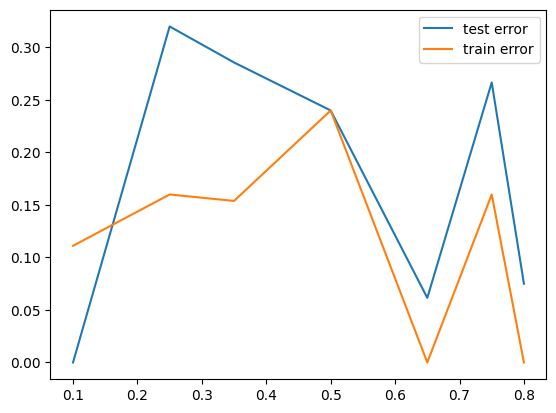

In [23]:
plt.plot(vals, errorvalstest, vals, errorvalstrain)
plt.legend(["test error", "train error"])

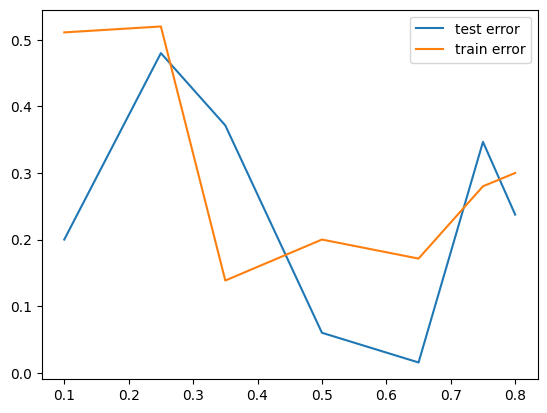

In [25]:
plt.plot(vals, errorvalstest2, vals, errorvalstrain2)
plt.legend(["test error", "train error"])